<a href="https://colab.research.google.com/github/carlafalcone93/DataScienceIII/blob/main/PROYECTOFINAL_CarlaFalcone_DataScienceIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1: Procesamiento de Lenguaje Natural (NLP)#

Se utilizó el libro “El Principito” en formato .txt para aplicar técnicas de NLP.

Tareas de Preprocesamiento realizadas
Tokenización y limpieza: Separamos el texto en palabras (tokens) y eliminamos signos de puntuación y caracteres innecesarios.

1. Lematización y Stopwords: Se eliminaron palabras vacías (stopwords) y se aplicó lematización para reducir palabras a su forma base.

2. Nube de Palabras (WordCloud): Visualizamos las palabras más frecuentes.

3. N-gramas (bigrama/trigrama): Identificamos combinaciones frecuentes de palabras consecutivas para entender patrones de estilo y temas.

4. Análisis de frecuencia: Visualizamos las palabras más comunes.

5. TF-IDF: Identificamos términos relevantes por su importancia contextual dentro del texto.

Carga de librerías

In [37]:
!pip install nltk wordcloud matplotlib seaborn scikit-learn --quiet

import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')       # Para tokenización
nltk.download('stopwords')   # Para eliminar palabras vacías
nltk.download('omw-1.4')  # WordNet data (traducciones)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Carga del archivo

In [38]:

with open("EL PRINCIPITO.txt", "r", encoding="utf-8") as file:
    texto = file.read()


In [39]:
print(text[:1000])

EL PRINCIPITO

ANTOINE DE SAINT-EXUPÉRY



A LEÓN WERTH



Pido perdón a los niños por haber dedicado este libro a una persona mayor. tengo
una seña excusa: esta persona mayor es el mejor amigo que tengo en el mundo.
Pero tengo otra excusa: esta persona mayor es capaz de comprenderlo todo,
incluso los libros para niños. Tengo una tercera excusa todavía: esta persona
mayor vive en Francia, donde pasa hambre y frío. Tiene, por consiguiente, una
gran necesidad de ser consolada. Si no fueran suficientes todas esas razones,
Quiero entonces dedicar este libro al niño que fue hace tiempo esta persona.
alcalde. Todas las personas mayores antes han sido niños. (Pero pocas de ellas lo
recuerdan). Corrijo, por consiguiente, mi dedicatoria:

A LEÓN WERTH
cuando era niño



Cuando yo tenía seis años vi en un libro sobre la selva virgen que se titulaba
"Historias vividas", una magnífica lámina. Representaba una serpiente boa que se
tragaba a una fiera. Esta es la copia del dibujo.




1



En el lib

Procesamiento de texto

In [47]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))


In [52]:
# Tokenización alternativa sin NLTK
tokens = texto_limpio.split()

# Definir stopwords en español
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))

# Filtrar tokens
tokens_filtrados = [word for word in tokens if word not in stop_words]

# Mostrar los primeros resultados
print(tokens_filtrados[:50])

lemmatizer = WordNetLemmatizer()
tokens_lemmatizados = [lemmatizer.lemmatize(w) for w in tokens_filtrados]

['principito', 'antoine', 'saintexupéry', 'león', 'werth', 'pido', 'perdón', 'niños', 'haber', 'dedicado', 'libro', 'persona', 'mayor', 'seña', 'excusa', 'persona', 'mayor', 'mejor', 'amigo', 'mundo', 'excusa', 'persona', 'mayor', 'capaz', 'comprenderlo', 'incluso', 'libros', 'niños', 'tercera', 'excusa', 'todavía', 'persona', 'mayor', 'vive', 'francia', 'pasa', 'hambre', 'frío', 'consiguiente', 'gran', 'necesidad', 'ser', 'consolada', 'si', 'suficientes', 'todas', 'razones', 'quiero', 'entonces', 'dedicar']


In [ ]:
Nube de palabras

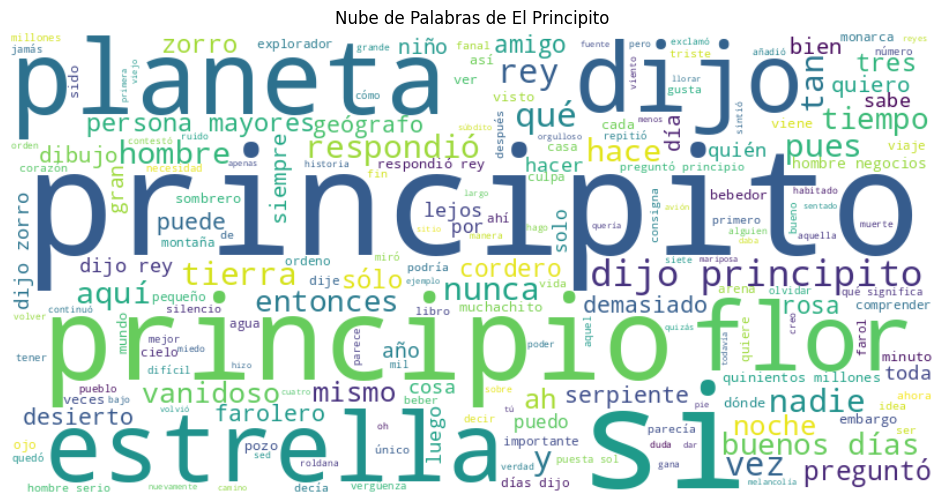

In [53]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens_lemmatizados))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de El Principito")
plt.show()


In [ ]:
Frecuencia de palabras

/tmp/ipython-input-54-3082741004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), palette="crest")


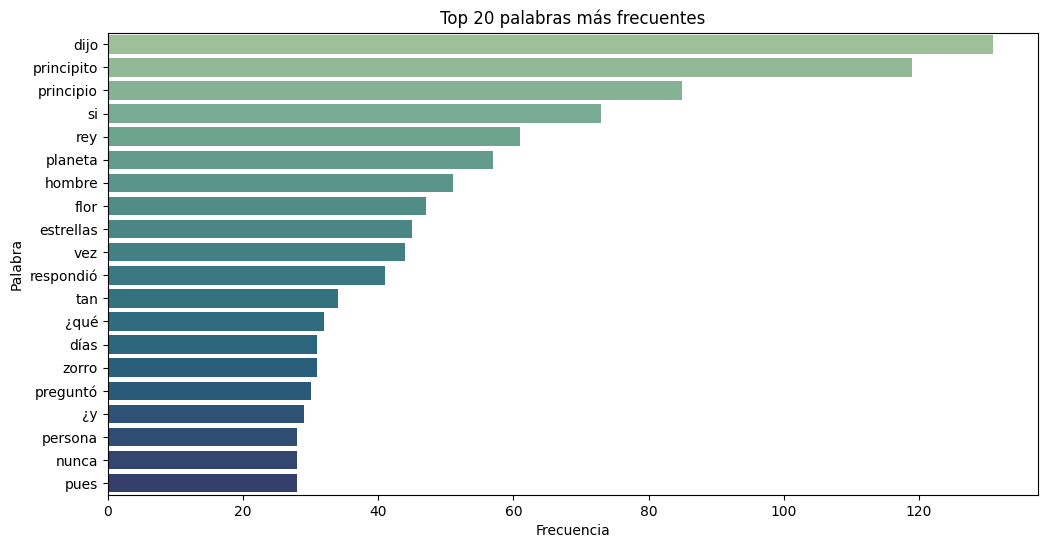

In [54]:
conteo = Counter(tokens_lemmatizados)
mas_comunes = conteo.most_common(20)

palabras, frecuencias = zip(*mas_comunes)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frecuencias), y=list(palabras), palette="crest")
plt.title("Top 20 palabras más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()


Análisis de n-gramas (bigrams y trigrams)

In [55]:
from nltk.util import ngrams

bigrams = list(ngrams(tokens_lemmatizados, 2))
trigrams = list(ngrams(tokens_lemmatizados, 3))

frecuencia_bigram = Counter(bigrams).most_common(10)
frecuencia_trigram = Counter(trigrams).most_common(10)

print("Top 10 Bigrams:")
for b in frecuencia_bigram:
    print(" ".join(b[0]), "->", b[1])

print("\nTop 10 Trigrams:")
for t in frecuencia_trigram:
    print(" ".join(t[0]), "->", t[1])


Top 10 Bigrams:
dijo principito -> 38
¡buenos días -> 24
persona mayores -> 19
dijo rey -> 14
dijo zorro -> 14
hombre negocios -> 13
respondió rey -> 12
días dijo -> 10
preguntó principio -> 10
quinientos millones -> 9

Top 10 Trigrams:
¡buenos días dijo -> 10
persona mayores extrañas -> 6
mil millas distancia -> 5
millas distancia lugar -> 5
distancia lugar habitado -> 5
días dijo principito -> 5
ave marina general -> 4
volvió preguntar principio -> 4
pregunta vez formulado -> 4
mayores extrañas decía -> 4


TF-IDF

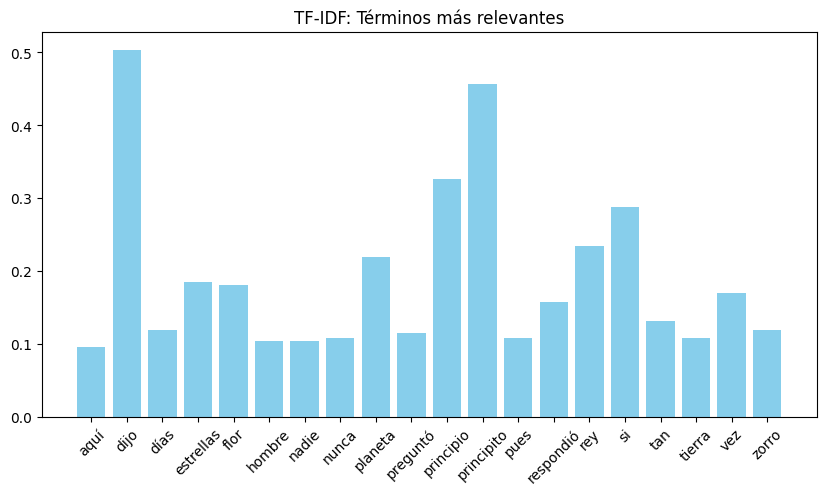

In [62]:
tfidf = TfidfVectorizer(max_features=20, stop_words=stopwords.words('spanish'))
X = tfidf.fit_transform([texto_limpio])

plt.figure(figsize=(10, 5))
plt.bar(tfidf.get_feature_names_out(), X.toarray()[0], color="skyblue")
plt.xticks(rotation=45)
plt.title("TF-IDF: Términos más relevantes")
plt.show()


#Parte 2: Deep Learning#

Creación de frases etiquetadas manualmente

In [63]:
frases = [
    "Me siento muy feliz por haber conocido al principito",        # positivo
    "Estoy triste por haber dejado mi flor",                       # negativo
    "El planeta del rey era muy pequeño",                          # neutro
    "La flor era muy vanidosa pero encantadora",                   # positivo
    "Estoy muy solo en este planeta",                              # negativo
    "La geografía sirve para muchas cosas",                        # neutro
    "Domesticar es crear vínculos verdaderos",                     # positivo
    "No quiero verte llorar",                                      # negativo
    "El principito viajó por muchos planetas",                     # neutro
    "Eres responsable de tu rosa",                                 # positivo
]

etiquetas = ['positivo', 'negativo', 'neutro', 'positivo', 'negativo',
             'neutro', 'positivo', 'negativo', 'neutro', 'positivo']


Preprocesar texto y vectorizar con Tokenizer

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Tokenización
tokenizer = Tokenizer()
tokenizer.fit_on_texts(frases)
secuencias = tokenizer.texts_to_sequences(frases)
X = pad_sequences(secuencias, padding='post')

# Codificar etiquetas
encoder = LabelEncoder()
y = encoder.fit_transform(etiquetas)
y = np.eye(3)[y]  # One-hot


Crear modelo

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

vocab_size = len(tokenizer.word_index) + 1
max_len = X.shape[1]

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len),  # ✅ lo dejamos
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, max_len))

model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 9, 32)          │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,611 (111.76 KB)

 Trainable params: 28,611 (111.76 KB)

 Non-trainable params: 0 (0.00 B)

Entrenar modelo

In [71]:
history = model.fit(X, y, epochs=30, verbose=1)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4000 - loss: 1.0969
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4000 - loss: 1.0975
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4000 - loss: 1.0954
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4000 - loss: 1.0924
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.4000 - loss: 1.0905
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4000 - loss: 1.0896
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4000 - loss: 1.0908
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4000 - loss: 1.0864
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4000 - loss: 1.0815
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4000 - loss: 1.0808
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4000 - loss: 1.0787
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4000 - loss: 1.0778
Ep

In [73]:
print(predecir("Estoy muy feliz con mi flor"))  # Esperado: positivo
print(predecir("Estoy solo y triste"))           # Esperado: negativo
print(predecir("El planeta era muy chico"))      # Esperado: neutro


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
negativo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
negativo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
negativo


Prueba con nuevas frases

In [72]:
def predecir(frase):
    sec = tokenizer.texts_to_sequences([frase])
    sec_padded = pad_sequences(sec, maxlen=max_len, padding='post')
    pred = model.predict(sec_padded)
    clase = encoder.inverse_transform([np.argmax(pred)])
    return clase[0]

# Ejemplo:
print(predecir("Extraño a mi flor"))       # Esperado: negativo
print(predecir("Qué lindo es tener amigos"))  # Esperado: positivo


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
negativo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
positivo


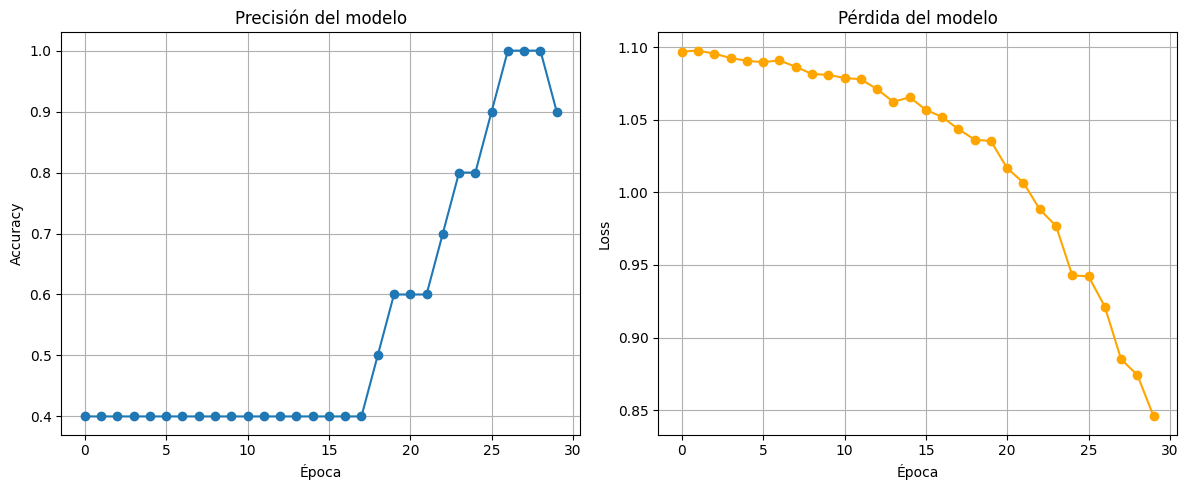

In [75]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', color='orange')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()
